In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [35]:
import os
print(os.getcwd())
import os


# Base path to the repository folder
base_path = r'C:\Users\novee\DataWareHousing_FinalProject\DataWareHousing_FinalProject'

# Construct the dataset path
dataset_path = os.path.join(base_path, 'python_server', 'Bicycle_Thefts_Open_Data.csv')

# Load the dataset
bike_data = pd.read_csv(dataset_path)
print(bike_data.head())


C:\Users\novee\anaconda3\envs\myenv
   OBJECTID EVENT_UNIQUE_ID   PRIMARY_OFFENCE               OCC_DATE  \
0         1  GO-20141263784  PROPERTY - FOUND    1/1/2014 5:00:00 AM   
1         2  GO-20141263544               B&E  12/26/2013 5:00:00 AM   
2         3  GO-20141261431       THEFT UNDER    1/1/2014 5:00:00 AM   
3         4  GO-20141267465       THEFT UNDER   9/30/2013 5:00:00 AM   
4         5  GO-20149000074       THEFT UNDER  12/25/2013 5:00:00 AM   

   OCC_YEAR  OCC_MONTH    OCC_DOW  OCC_DAY  OCC_DOY  OCC_HOUR  ... BIKE_COST  \
0      2014    January  Wednesday        1        1        18  ...       NaN   
1      2013   December   Thursday       26      360        19  ...    1300.0   
2      2014    January  Wednesday        1        1         7  ...       NaN   
3      2013  September     Monday       30      273         0  ...     750.0   
4      2013   December  Wednesday       25      359        16  ...    1500.0   

      STATUS HOOD_158             NEIGHBOURHOOD_15

In [ ]:
# Load Data Sourceon_server\Bicycle_Thefts_Open_Data.csvB') 
bike_data = pd.read_csv('Bicycle_Thefts_Open_Data.csv')
print(bike_data.head())


FileNotFoundError: [Errno 2] No such file or directory: 'python_server/Bicycle_Thefts_Open_Data.csv'

-----------------------------------
-------- Data exploration ---------
-----------------------------------


--------------------------
-------- Summary ---------
--------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37178 entries, 0 to 37177
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           37178 non-null  int64  
 1   EVENT_UNIQUE_ID    37178 non-null  object 
 2   PRIMARY_OFFENCE    37178 non-null  object 
 3   OCC_DATE           37178 non-null  object 
 4   OCC_YEAR           37178 non-null  int64  
 5   OCC_MONTH          37178 non-null  object 
 6   OCC_DOW            37178 non-null  object 
 7   OCC_DAY            37178 non-null  int64  
 8   OCC_DOY            37178 non-null  int64  
 9   OCC_HOUR           37178 non-null  int64  
 10  REPORT_DATE        37178 non-null  object 
 11  REPORT_YEAR        37178 non-null  int64  
 12  REPORT_MONTH       371

Matplotlib is building the font cache; this may take a moment.



------------------------------------------
-------- Histogram of bike costs ---------
------------------------------------------



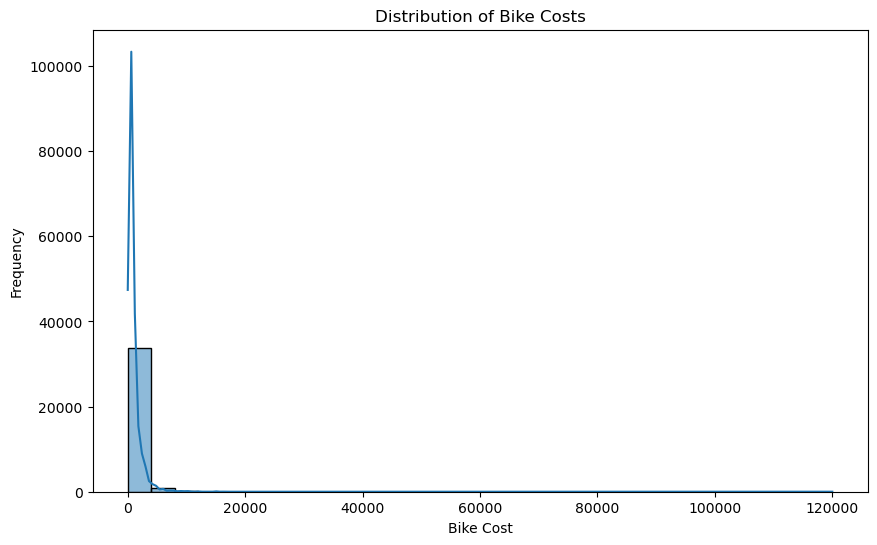


--------------------------------------
-------- Correlation heatmap ---------
--------------------------------------



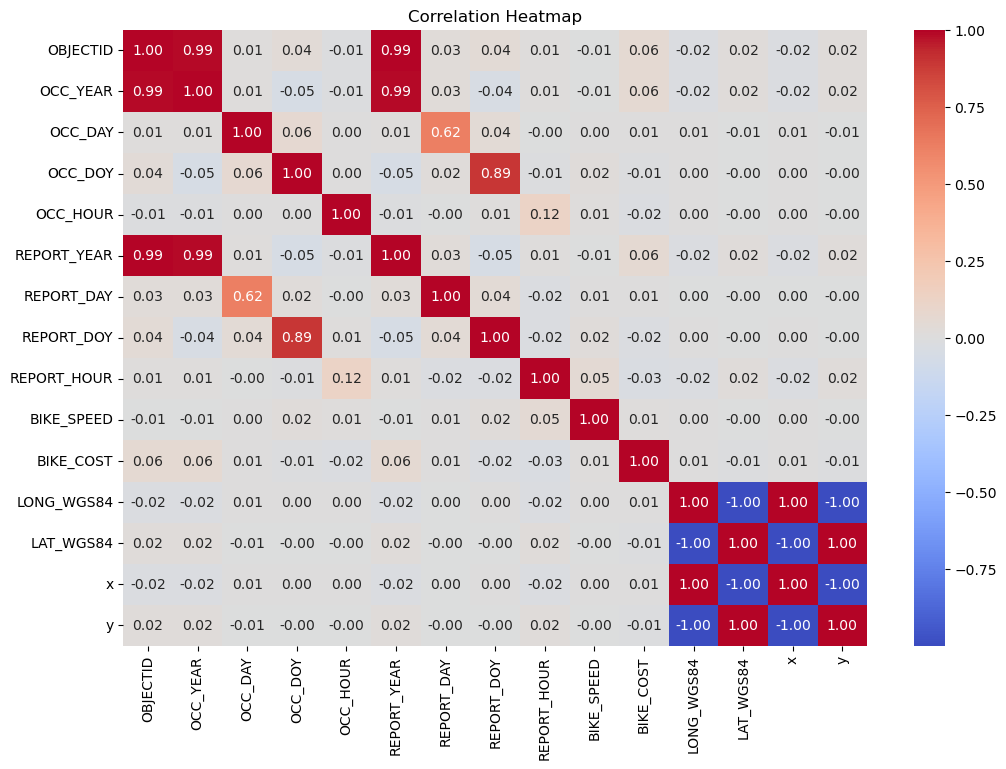


-------------------------------------------------
-------- Histogram of mean of BIKE_COST ---------
-------------------------------------------------



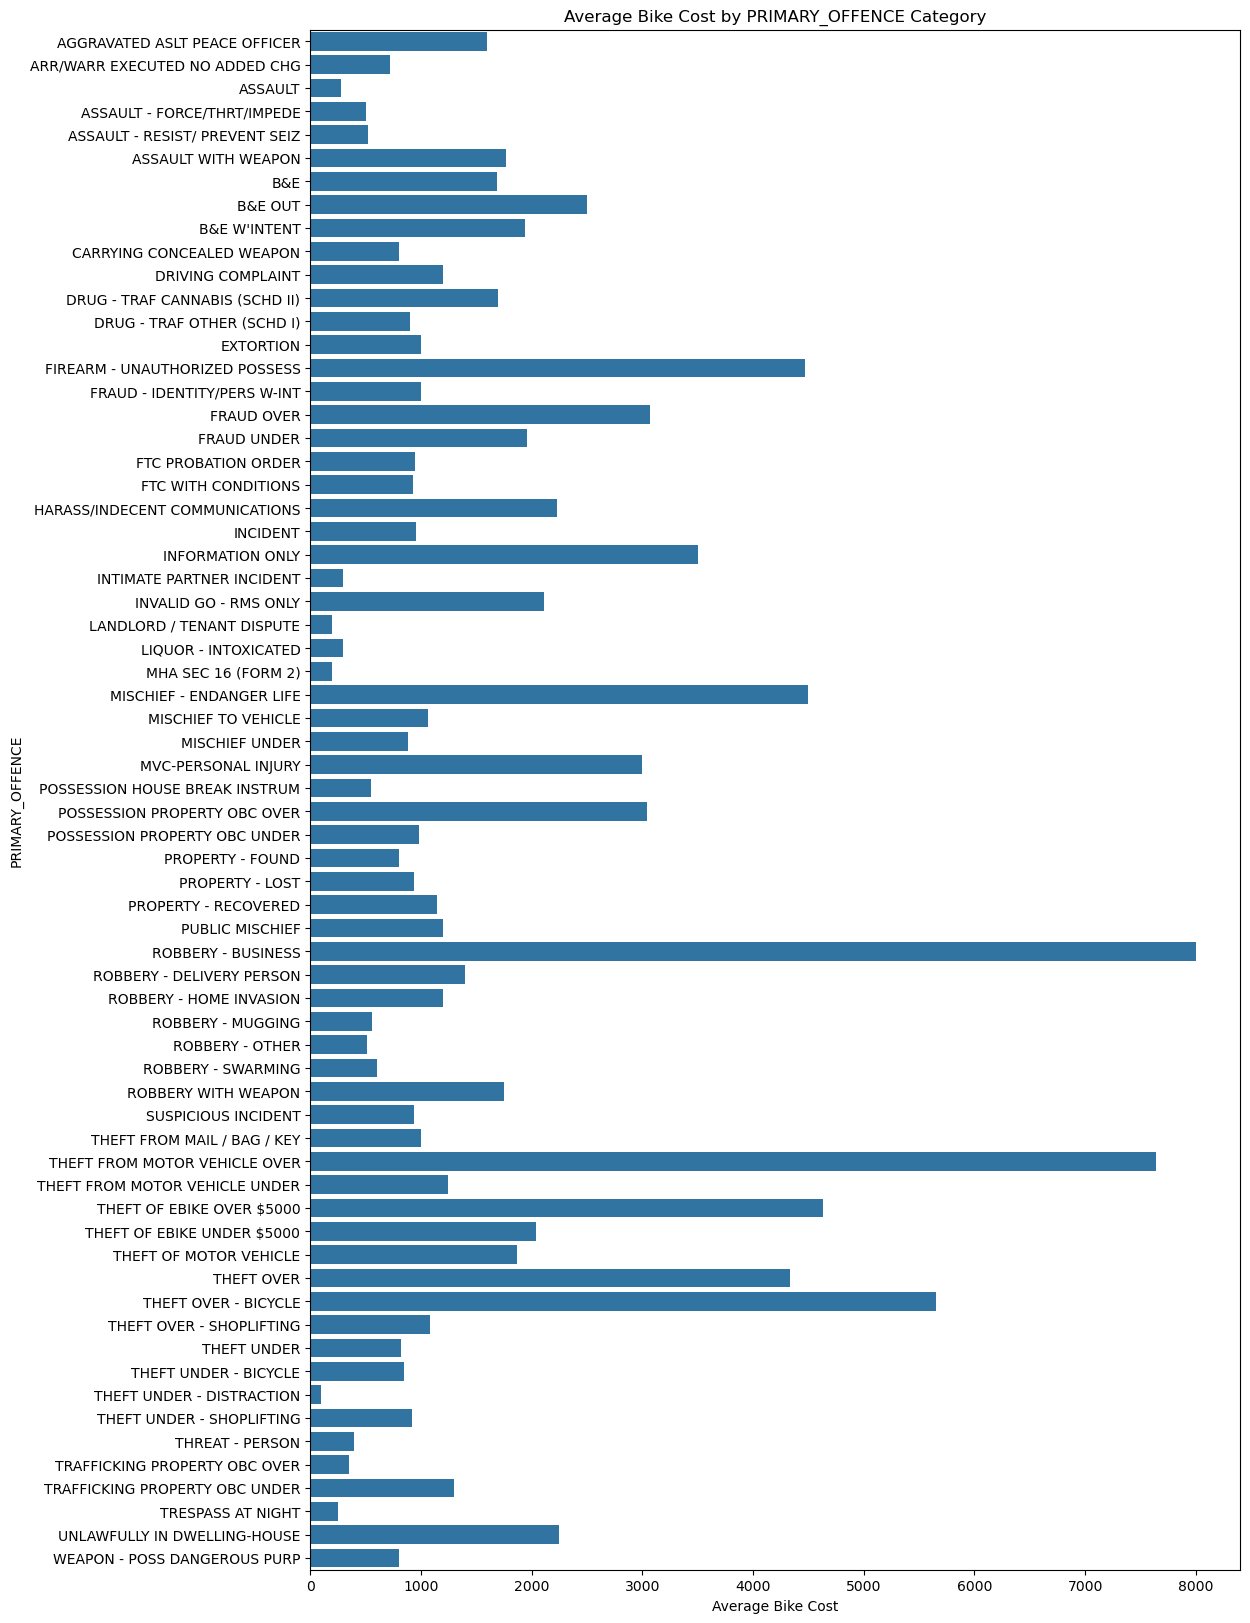

In [16]:
## 1 -  Data exploration

# a) Load and describe data elements (columns), provide descriptions & types, ranges and values of elements as appropriate - use pandas, numpy and any other python packages.
# b) Statistical assessments including means, averages, and correlations.
# c) Missing data evaluations
# d) Graphs and visualizations

print("-----------------------------------")
print("-------- Data exploration ---------")
print("-----------------------------------")
print("")

# Quick summary of the dataset
print("")
print("--------------------------")
print("-------- Summary ---------")
print("--------------------------")
print("")

print(bike_data.info())

# Statistical summary of the dataset
print("")
print("------------------------------------------")
print("-------- Statistical Assessments ---------")
print("------------------------------------------")
print("")

print(bike_data.describe())

# Display the first few rows of the dataset
print("")
print("---------------------------------")
print("-------- First Few Rows ---------")
print("---------------------------------")
print("")
print(bike_data.head())

# Display the data range of each column
print("")
print("-------------------------------------")
print("-------- Columns Data Range ---------")
print("-------------------------------------")
print("")
for column in bike_data.columns:
    if bike_data[column].dtype in [np.int64, np.float64]:
        min_value = bike_data[column].min()
        max_value = bike_data[column].max()
        print(f"{column}: Min: {min_value}, Max: {max_value}")
    else:
        unique_values = bike_data[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)

    print("")

# Display the data types of each column
print("")
print("------------------------------------")
print("-------- Columns Data Type ---------")
print("------------------------------------")
print("")
print(bike_data.dtypes)

# Check for missing values
print("")
print("-------------------------------")
print("-------- Missing Data ---------")
print("-------------------------------")
print("")
print(bike_data.isnull().sum())

# Select only numeric columns for correlation matrix
numeric_data = bike_data.select_dtypes(include=[np.number])

# Correlation matrix
print("")
print("-------------------------------------")
print("-------- Correlation Matrix ---------")
print("-------------------------------------")
print("")
print(numeric_data.corr())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of bike costs
print("")
print("------------------------------------------")
print("-------- Histogram of bike costs ---------")
print("------------------------------------------")
print("")
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['BIKE_COST'], bins=30, kde=True)
plt.title('Distribution of Bike Costs')
plt.xlabel('Bike Cost')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
print("")
print("--------------------------------------")
print("-------- Correlation heatmap ---------")
print("--------------------------------------")
print("")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of mean of BIKE_COST based on PRIMARY_OFFENCE
print("")
print("-------------------------------------------------")
print("-------- Histogram of mean of BIKE_COST ---------")
print("-------------------------------------------------")
print("")

# Calculate the mean BIKE_COST for each PRIMARY_OFFENCE category
mean_bike_cost_by_offence = bike_data.groupby('PRIMARY_OFFENCE')['BIKE_COST'].mean()

# Remove categories with NaN values
mean_bike_cost_by_offence = mean_bike_cost_by_offence.dropna()

plt.figure(figsize=(12, 20))
sns.barplot(x=mean_bike_cost_by_offence.values, y=mean_bike_cost_by_offence.index)
plt.title('Average Bike Cost by PRIMARY_OFFENCE Category')
plt.xlabel('Average Bike Cost')
plt.ylabel('PRIMARY_OFFENCE')
plt.show()


=== Class Distribution Analysis ===

Absolute counts per class:
STATUS
STOLEN       36179
UNKNOWN        610
RECOVERED      389
Name: count, dtype: int64

Percentage distribution:
STOLEN: 97.31%
UNKNOWN: 1.64%
RECOVERED: 1.05%

Imbalance ratio (majority:minority): 93.01:1


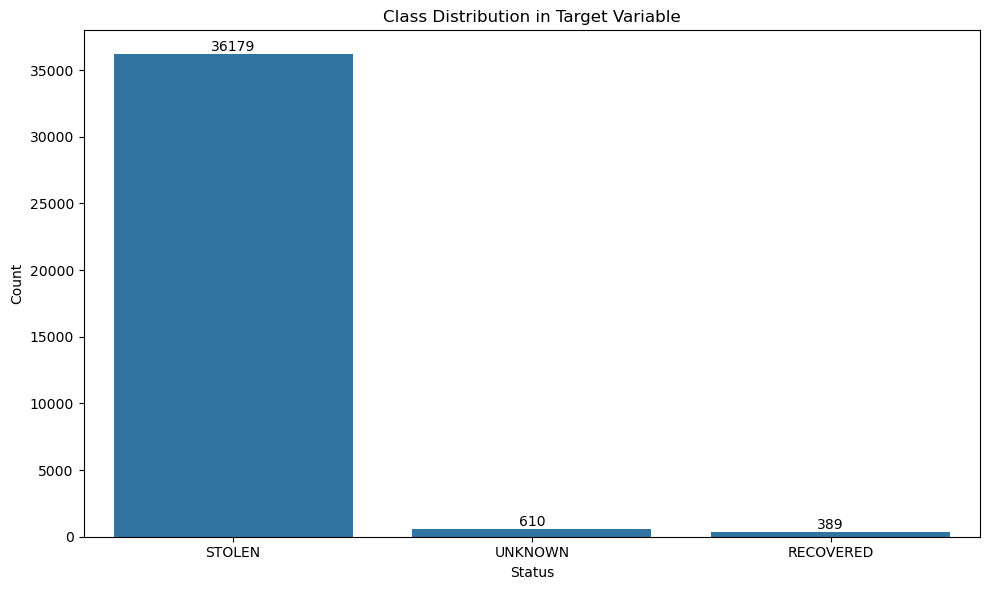


=== Analysis of EVENT_UNIQUE_ID by STATUS ===

Percentage of each class by category:
STATUS           RECOVERED  STOLEN  UNKNOWN
EVENT_UNIQUE_ID                            
GO-20141261431         0.0   100.0      0.0
GO-20141263544         0.0   100.0      0.0
GO-20141263784       100.0     0.0      0.0
GO-20141266048         0.0   100.0      0.0
GO-20141267465         0.0   100.0      0.0
...                    ...     ...      ...
GO-202496747         100.0     0.0      0.0
GO-2024972364          0.0   100.0      0.0
GO-2024972973          0.0   100.0      0.0
GO-2024982279          0.0   100.0      0.0
GO-2024994950          0.0   100.0      0.0

[33266 rows x 3 columns]

=== Analysis of PRIMARY_OFFENCE by STATUS ===

Percentage of each class by category:
STATUS                           RECOVERED  STOLEN    UNKNOWN
PRIMARY_OFFENCE                                              
AGGRAVATED ASLT PEACE OFFICER     0.000000   100.0   0.000000
ARR/WARR EXECUTED NO ADDED CHG    0.000000  

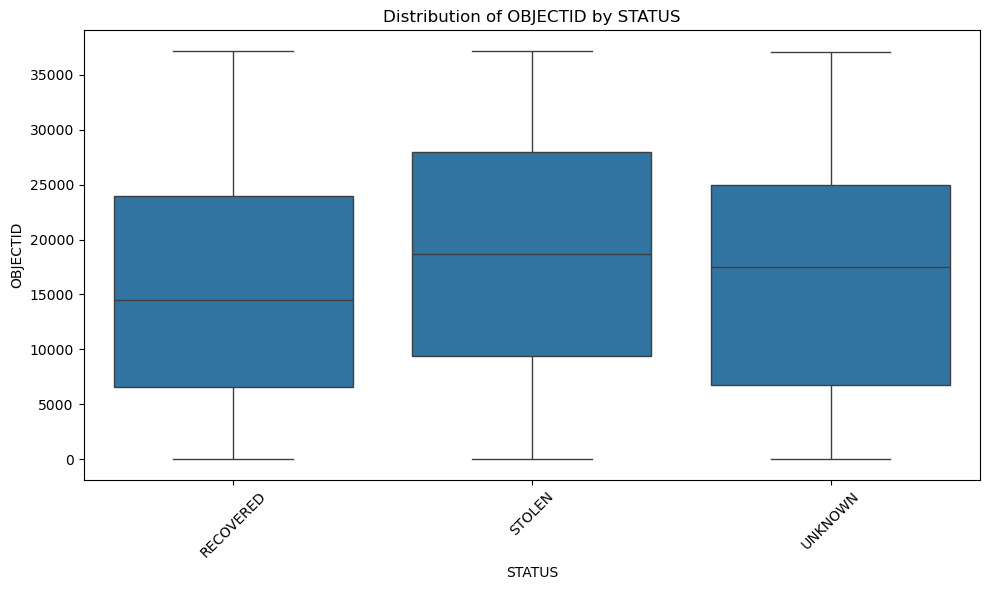


=== Analysis of OCC_YEAR by STATUS ===

Mean value by class:
STATUS
RECOVERED    2017.940874
STOLEN       2018.736560
UNKNOWN      2018.139344
Name: OCC_YEAR, dtype: float64


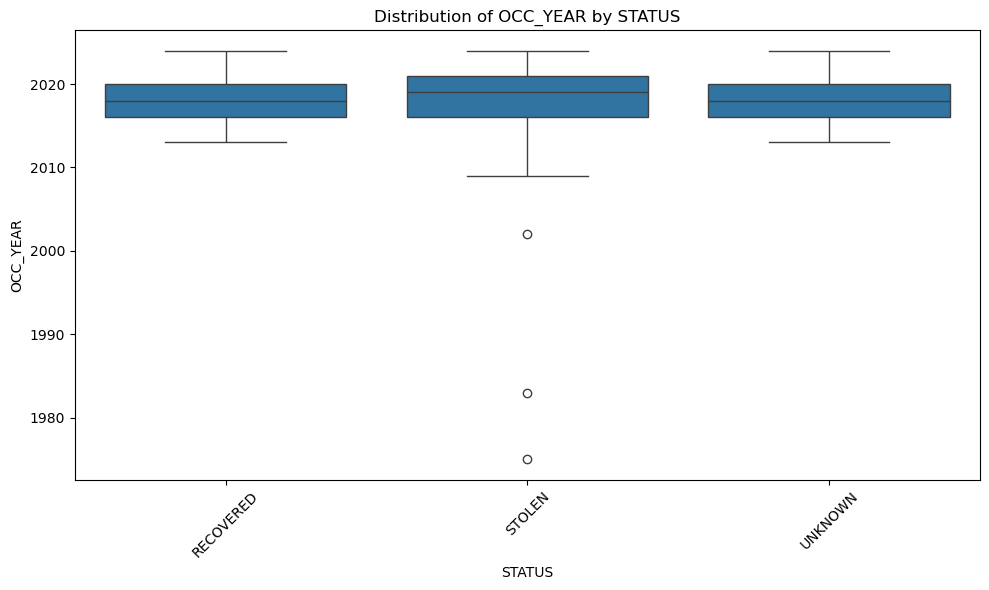


=== Analysis of OCC_DAY by STATUS ===

Mean value by class:
STATUS
RECOVERED    14.938303
STOLEN       15.662373
UNKNOWN      15.088525
Name: OCC_DAY, dtype: float64


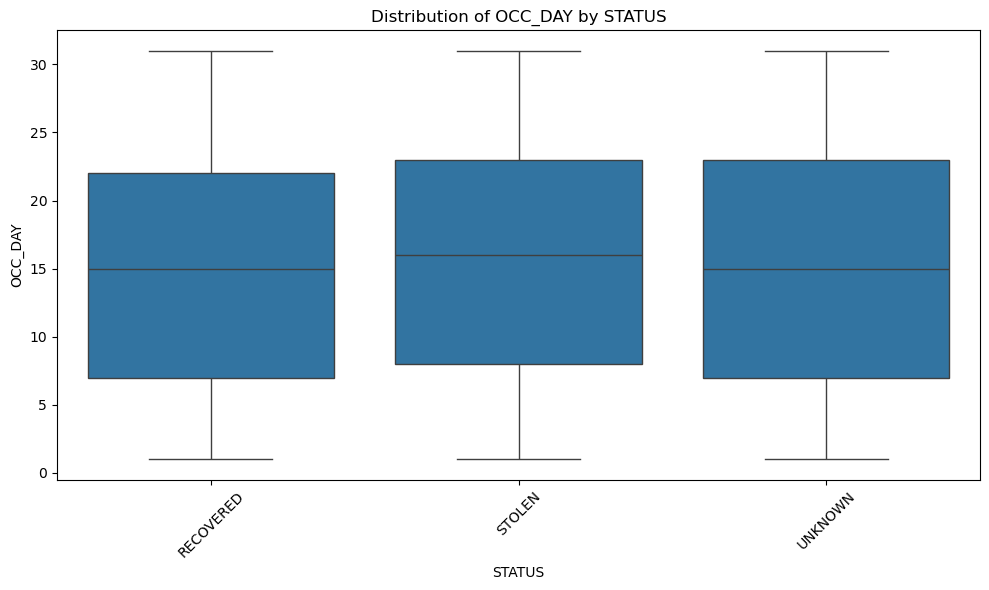


=== Analysis of OCC_DOY by STATUS ===

Mean value by class:
STATUS
RECOVERED    192.128535
STOLEN       199.984632
UNKNOWN      201.711475
Name: OCC_DOY, dtype: float64


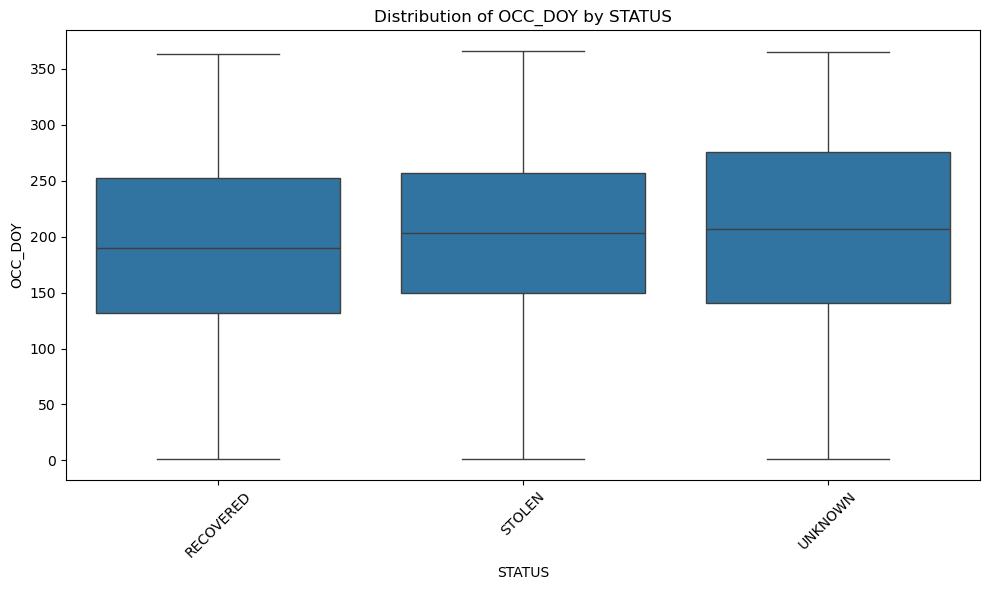


=== Analysis of OCC_HOUR by STATUS ===

Mean value by class:
STATUS
RECOVERED    13.015424
STOLEN       13.313193
UNKNOWN      12.249180
Name: OCC_HOUR, dtype: float64


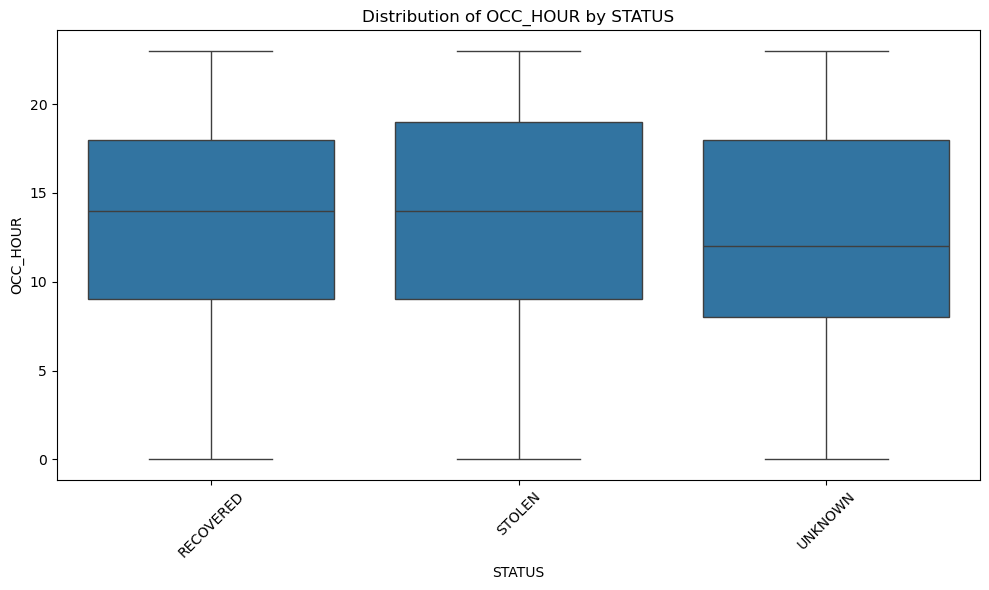


=== Analysis of REPORT_YEAR by STATUS ===

Mean value by class:
STATUS
RECOVERED    2017.951157
STOLEN       2018.759114
UNKNOWN      2018.150820
Name: REPORT_YEAR, dtype: float64


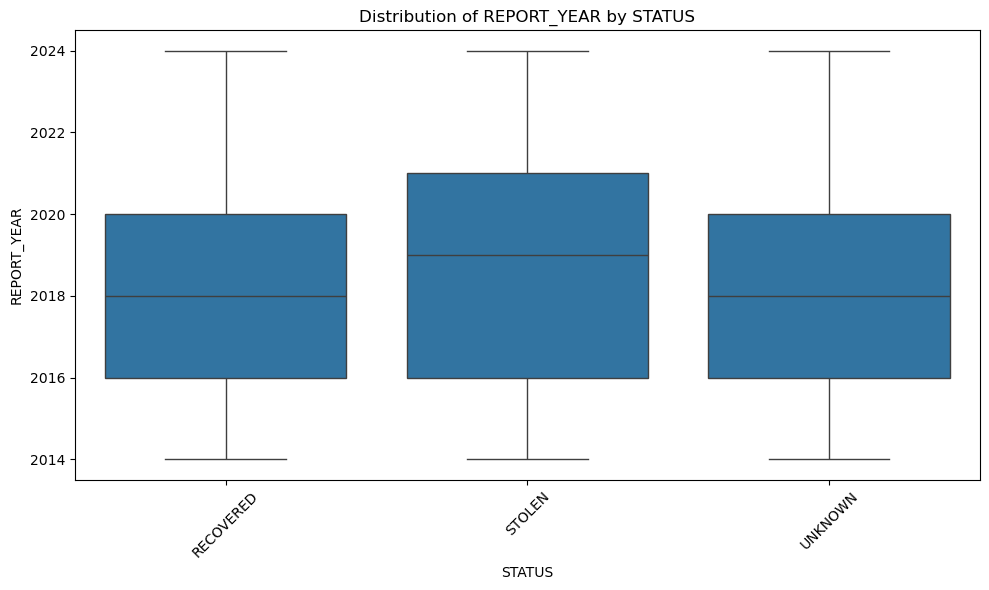


=== Analysis of REPORT_DAY by STATUS ===

Mean value by class:
STATUS
RECOVERED    14.796915
STOLEN       16.003096
UNKNOWN      15.357377
Name: REPORT_DAY, dtype: float64


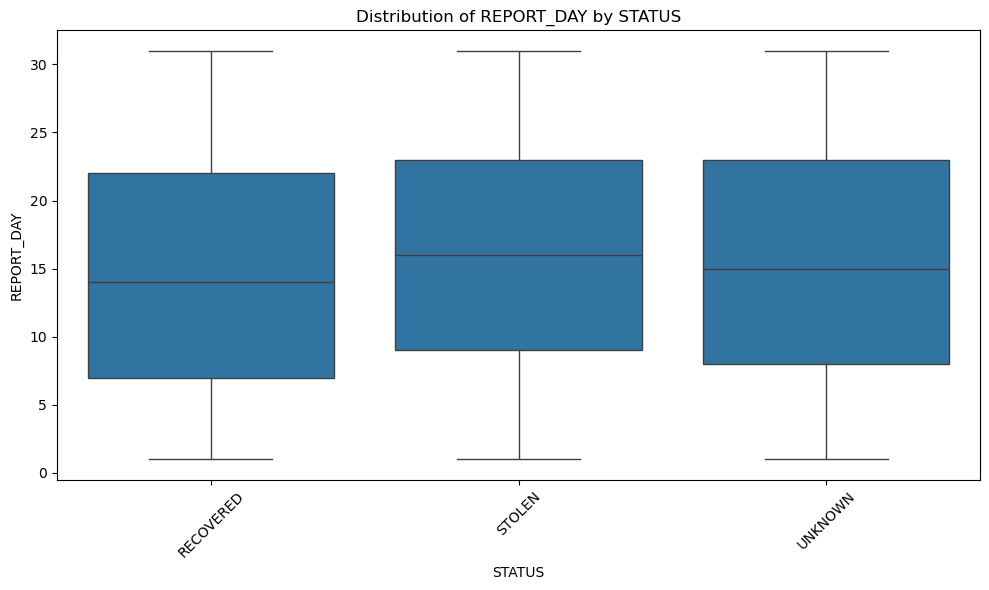


=== Analysis of REPORT_DOY by STATUS ===

Mean value by class:
STATUS
RECOVERED    192.848329
STOLEN       201.028331
UNKNOWN      204.865574
Name: REPORT_DOY, dtype: float64


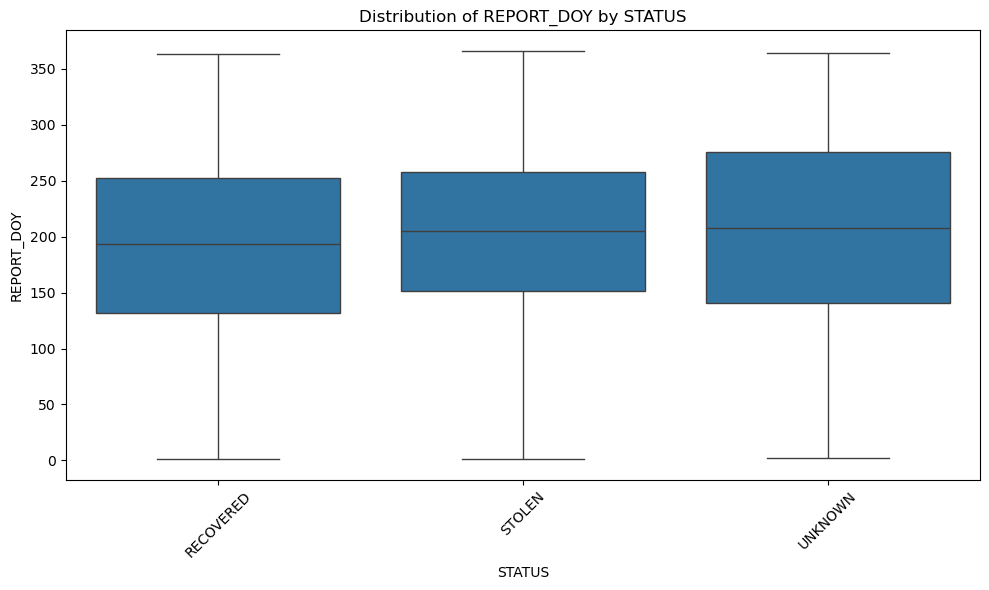


=== Analysis of REPORT_HOUR by STATUS ===

Mean value by class:
STATUS
RECOVERED    13.660668
STOLEN       14.295282
UNKNOWN      12.790164
Name: REPORT_HOUR, dtype: float64


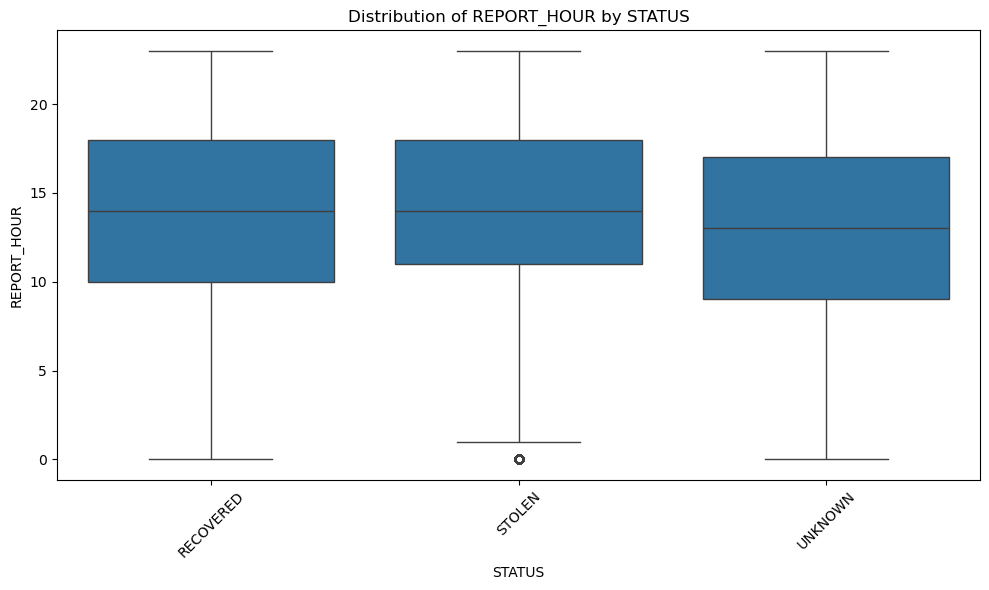


=== Analysis of BIKE_SPEED by STATUS ===

Mean value by class:
STATUS
RECOVERED    15.123393
STOLEN       14.086206
UNKNOWN      14.400000
Name: BIKE_SPEED, dtype: float64


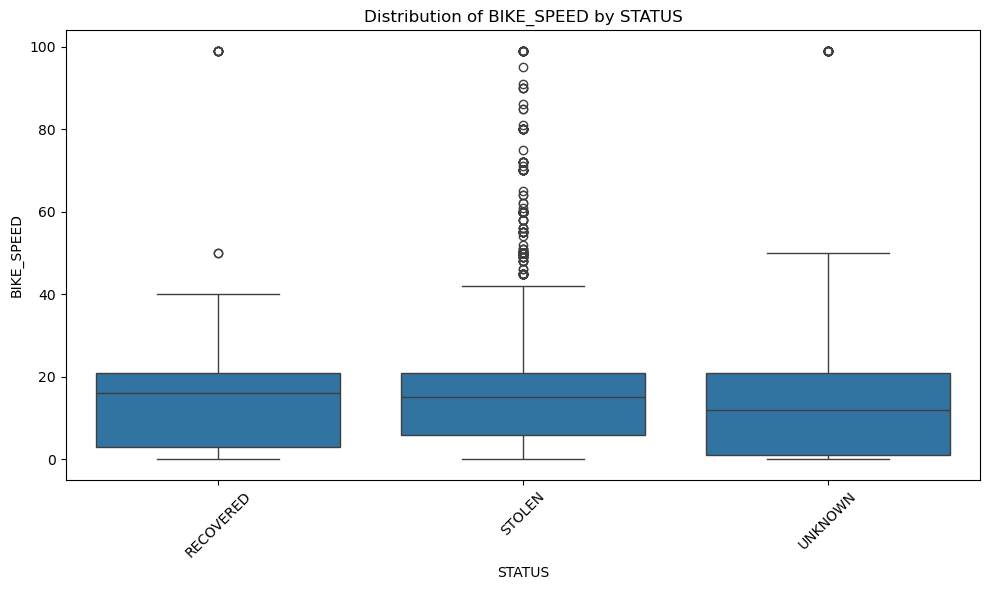


=== Analysis of BIKE_COST by STATUS ===

Mean value by class:
STATUS
RECOVERED    1171.093454
STOLEN        998.497624
UNKNOWN      1055.659427
Name: BIKE_COST, dtype: float64


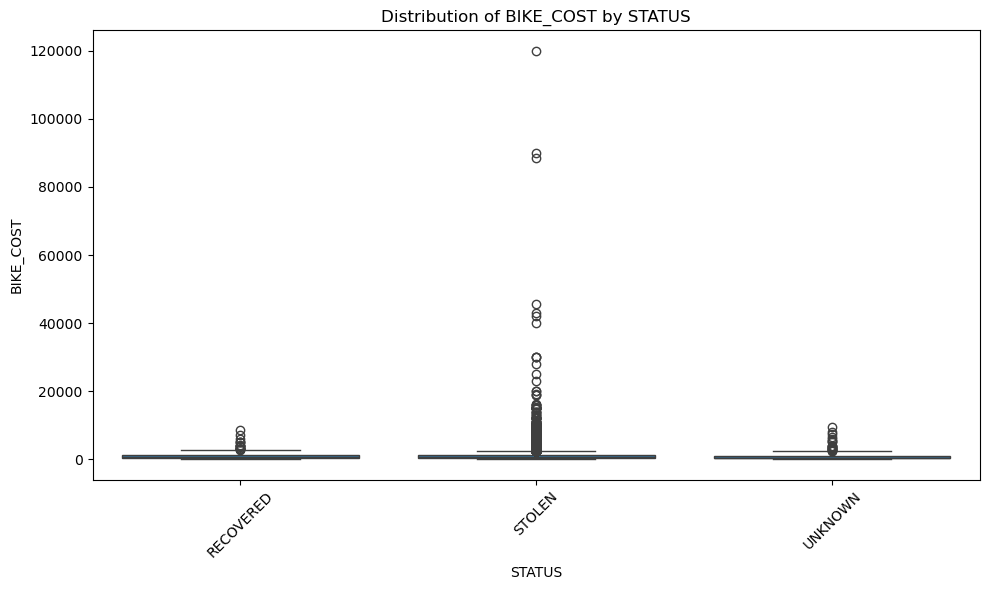


=== Analysis of LONG_WGS84 by STATUS ===

Mean value by class:
STATUS
RECOVERED   -78.578415
STOLEN      -78.710040
UNKNOWN     -77.432572
Name: LONG_WGS84, dtype: float64


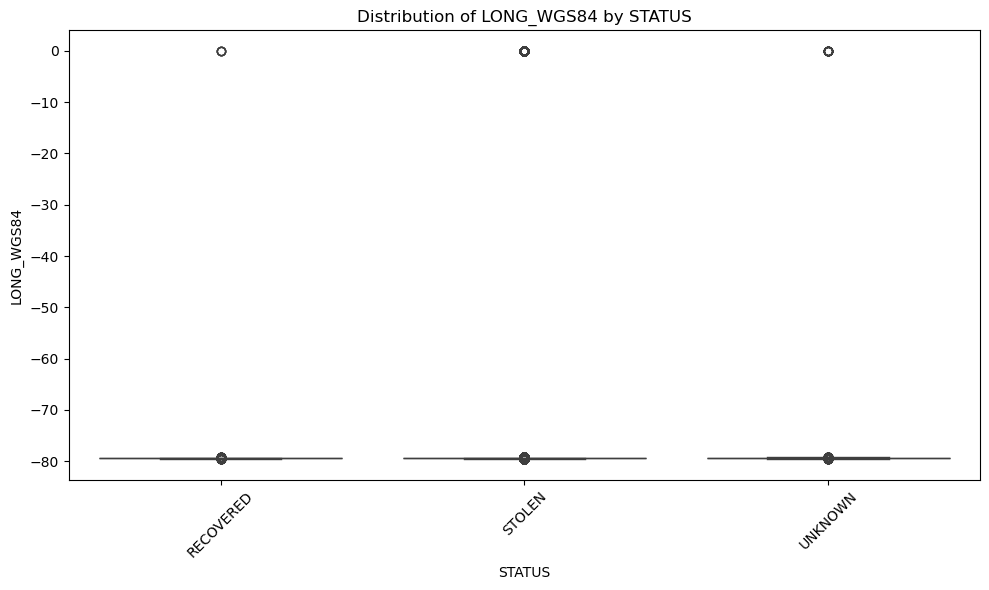


=== Analysis of LAT_WGS84 by STATUS ===

Mean value by class:
STATUS
RECOVERED    43.225837
STOLEN       43.297696
UNKNOWN      42.614006
Name: LAT_WGS84, dtype: float64


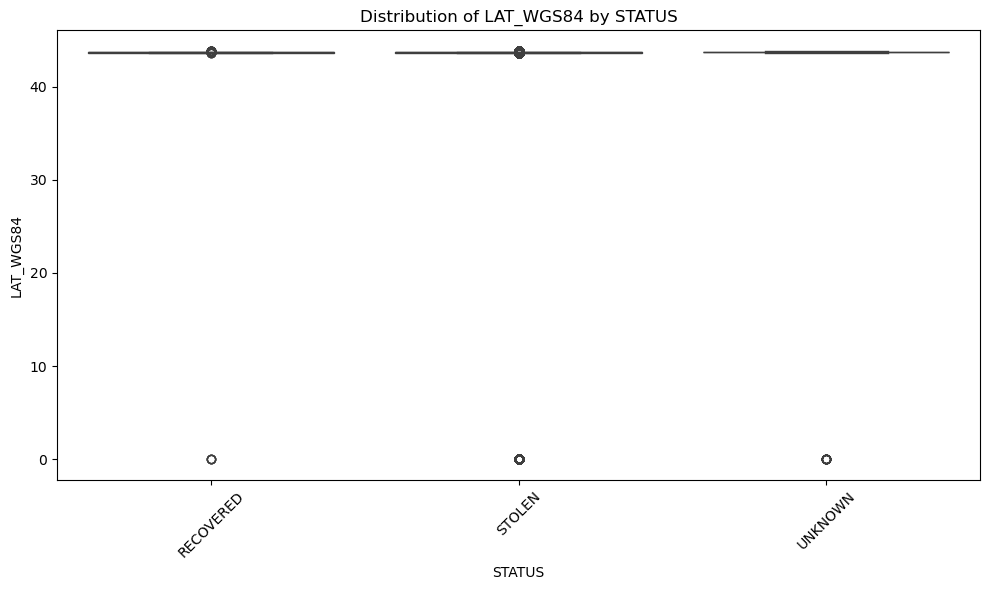


=== Analysis of x by STATUS ===

Mean value by class:
STATUS
RECOVERED   -8.747309e+06
STOLEN      -8.761962e+06
UNKNOWN     -8.619754e+06
Name: x, dtype: float64


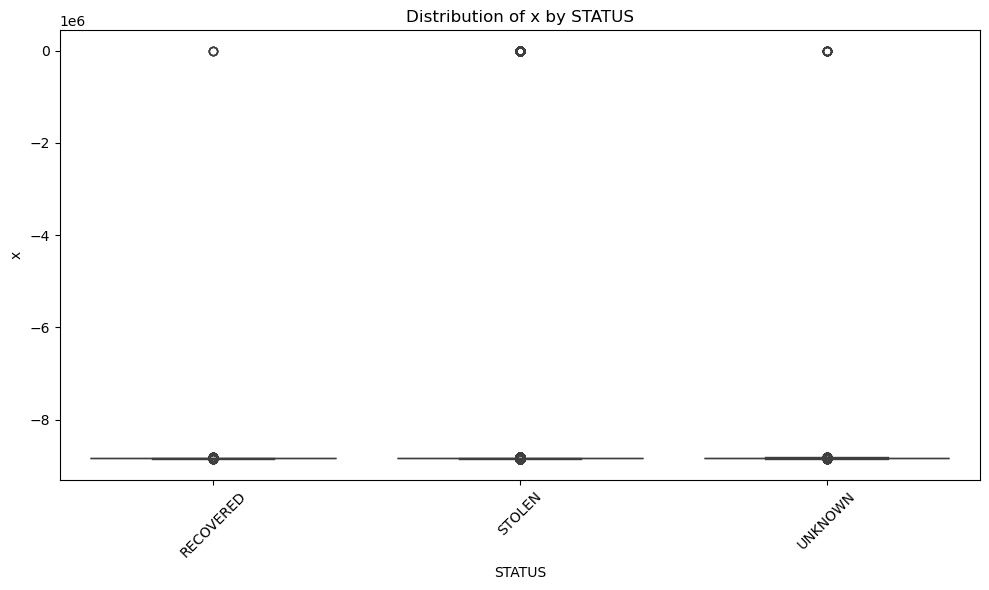


=== Analysis of y by STATUS ===

Mean value by class:
STATUS
RECOVERED    5.359593e+06
STOLEN       5.368485e+06
UNKNOWN      5.284123e+06
Name: y, dtype: float64


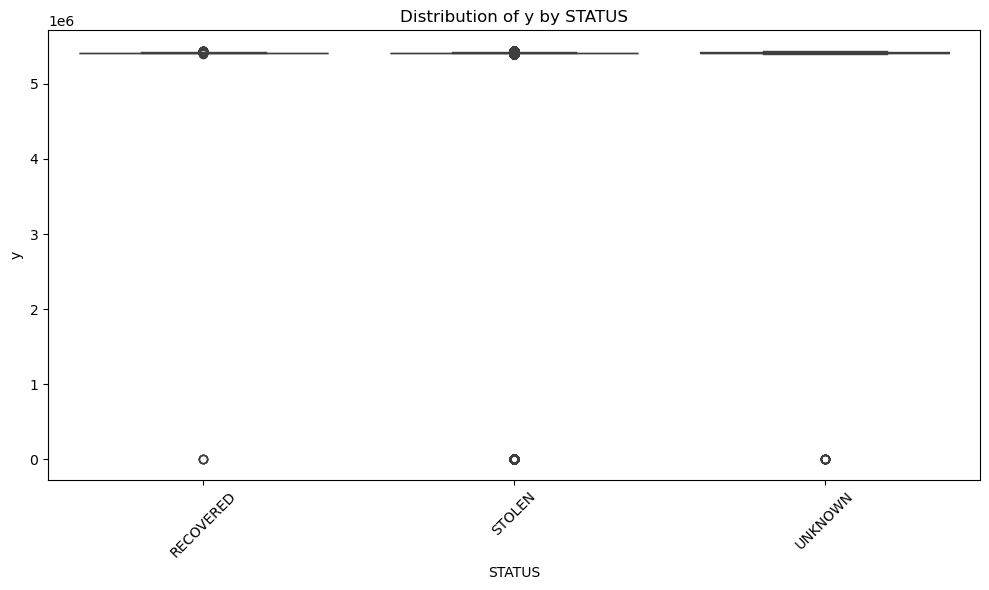


=== Recommended Strategies for Handling Class Imbalance ===
Severe imbalance detected. Consider:
1. Combination of SMOTE and undersampling (SMOTETomek or SMOTEENN)
2. Deep learning approaches with custom loss functions
3. Anomaly detection approaches if minority class is very rare


In [ ]:
## 2 - Data modelling

def analyze_class_distribution(df, target_column='STATUS'):
    """
    Analyze and visualize class distribution in the target variable.
    Also provides statistical measures of imbalance.
    """
    # Calculate class distribution
    class_counts = df[target_column].value_counts()
    total_samples = len(df)
    
    print("\n=== Class Distribution Analysis ===")
    print("\nAbsolute counts per class:")
    df.reset_option('display.max_rows')
    df.reset_option('display.max_columns')

    print(class_counts)
    
    # Calculate percentages
    class_percentages = (class_counts / total_samples) * 100
    print("\nPercentage distribution:")
    for class_name, percentage in class_percentages.items():
        print(f"{class_name}: {percentage:.2f}%")
    
    # Calculate imbalance metrics
    majority_class = class_counts.max()
    minority_class = class_counts.min()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\nImbalance ratio (majority:minority): {imbalance_ratio:.2f}:1")
    
    # Visualize distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('Class Distribution in Target Variable')
    plt.ylabel('Count')
    plt.xlabel('Status')
    for i, v in enumerate(class_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
    return class_counts, imbalance_ratio

def identify_features_importance_by_class(df, target_column='STATUS'):
    """
    Analyze the relationship between features and target classes
    to understand which features might be most important for prediction.
    """
    # Analyze categorical features
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if col != target_column]
    
    for column in categorical_columns:
        print(f"\n=== Analysis of {column} by {target_column} ===")
        cross_tab = pd.crosstab(df[column], df[target_column], normalize='index') * 100
        print("\nPercentage of each class by category:")
        print(cross_tab)
    
    # Analyze numerical features
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in numerical_columns:
        print(f"\n=== Analysis of {column} by {target_column} ===")
        print("\nMean value by class:")
        print(df.groupby(target_column)[column].mean())
        
        # Visualize distribution
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_column, y=column, data=df)
        plt.title(f'Distribution of {column} by {target_column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def suggest_handling_strategy(imbalance_ratio):
    """
    Suggest appropriate strategies for handling class imbalance
    based on the imbalance ratio.
    """
    print("\n=== Recommended Strategies for Handling Class Imbalance ===")
    
    if imbalance_ratio < 3:
        print("Mild imbalance detected. Consider:")
        print("1. Using standard algorithms with their default parameters")
        print("2. Adjusting class weights in the model")
    elif imbalance_ratio < 10:
        print("Moderate imbalance detected. Consider:")
        print("1. SMOTE (Synthetic Minority Over-sampling Technique)")
        print("2. Class weights adjustment")
        print("3. Ensemble methods like Random Forest with balanced class weights")
    else:
        print("Severe imbalance detected. Consider:")
        print("1. Combination of SMOTE and undersampling (SMOTETomek or SMOTEENN)")
        print("2. Deep learning approaches with custom loss functions")
        print("3. Anomaly detection approaches if minority class is very rare")

def main():
    # Load your dataset
    bike_data = pd.read_csv(dataset_path)
    
    # Analyze class distribution
    class_counts, imbalance_ratio = analyze_class_distribution(bike_data)
    
    # Analyze feature importance by class
    identify_features_importance_by_class(bike_data)
    
    # Get recommendations for handling the imbalance
    suggest_handling_strategy(imbalance_ratio)
    
    return class_counts, imbalance_ratio

if __name__ == "__main__":
    class_counts, imbalance_ratio = main()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def imp_features(df):
    
   return [
        'BIKE_TYPE',          # Type of bicycle
        'BIKE_COST',          # Cost of bicycle
        'LOCATION_TYPE',      # Where the theft occurred
        'PREMISES_TYPE',      # Type of premises
        'HOOD_158',           # Neighborhood
        'STATUS'              # Target variable
    ]
def handle_missing_values(df):
    
    # Fill missing values in BIKE_COST with median
    df['BIKE_COST'] = df['BIKE_COST'].fillna(df['BIKE_COST'].median())
    
    # Fill categorical missing values with 'Unknown'
    categorical_columns = ['BIKE_TYPE', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
    for col in categorical_columns:
        df[col] = df[col].fillna('Unknown')
    
    return df
def encode_categories(df):
    """
    Converts categorical variables to numbers using simple label encoding.
    """
    from sklearn.preprocessing import LabelEncoder
    
    # Columns that need to be encoded
    categorical_columns = ['BIKE_TYPE', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
    
    # Create a label encoder for each categorical column
    encoders = {}
    for column in categorical_columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        encoders[column] = encoder
    
    return df, encoders
def scale_features(df):
    """
    Standardizes numerical features by removing the mean and scaling to unit variance.
    """
    from sklearn.preprocessing import StandardScaler
    
    # Select numerical columns
    numerical_columns = ['BIKE_COST']
    
    # Create a StandardScaler object
    scaler = StandardScaler()
    
    # Standardize the numerical columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df, scaler
def handle_class_imbalance(X_train, y_train, method='undersampling'):
    """
    Handles class imbalance using either undersampling or class weights.
    
    Parameters:
        X_train: Training features
        y_train: Target variable
        method: 'undersampling' or 'class_weights'
        
    Returns:
        X_balanced: Balanced features
        y_balanced: Balanced target
    """
    if method == 'undersampling':
        # Convert to DataFrame for easier manipulation
        X_train_df = pd.DataFrame(X_train)
        
        # Separate majority (stolen) and minority (recovered) classes
        stolen_cases = X_train_df[y_train == 0]
        recovered_cases = X_train_df[y_train == 1]
        
        # Undersample majority class to match minority class size
        stolen_cases_undersampled = resample(
            stolen_cases,
            replace=False,
            n_samples=len(recovered_cases),
            random_state=42
        )
        
        # Combine minority class with undersampled majority class
        X_balanced = pd.concat([stolen_cases_undersampled, recovered_cases])
        y_balanced = np.array([0] * len(recovered_cases) + [1] * len(recovered_cases))
        
        print(f"Original dataset shape: {len(y_train)}")
        print(f"Balanced dataset shape: {len(y_balanced)}")
        
        return X_balanced, y_balanced
    
    return X_train, y_train

    
class BikeTheftModeler:
    """
    A modeler for bicycle theft prediction that handles class imbalance.
    Provides options for both undersampling and class weights approaches.
    """
    def __init__(self):
        self.best_model = None
        self.training_method = None
    
    def train_model(self, X_train, y_train, balance_method='undersampling'):
        """
        Trains models using specified class imbalance handling method
        
        Parameters:
            X_train: Training features
            y_train: Training target
            balance_method: How to handle class imbalance ('undersampling' or 'class_weights')
        """
        print("\nStarting model training...")
        print(f"Original class distribution:\n{pd.Series(y_train).value_counts(normalize=True)}")
        
        # Handle class imbalance
        if balance_method == 'undersampling':
            X_balanced, y_balanced = handle_class_imbalance(X_train, y_train, 'undersampling')
            class_weights = None
            self.training_method = 'undersampling'
        else:
            X_balanced, y_balanced = X_train, y_train
            class_weights = 'balanced'
            self.training_method = 'class_weights'
        
        # Create and train model
        model = RandomForestClassifier(
            n_estimators=100,
            class_weight=class_weights,
            random_state=42
        )
        
        print(f"\nTraining with {self.training_method}...")
        model.fit(X_balanced, y_balanced)
        self.best_model = model
        
        return model
    
    def evaluate_model(self, model, X_test, y_test):
        """
        Evaluates model with metrics suitable for imbalanced classification
        """
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        print("\nModel Performance:")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
        print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
        
        # Calculate and display feature importance
        feature_importance = pd.DataFrame({
            'feature': X_test.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nFeature Importance:")
        print(feature_importance)    
        
        
def main():
    # Load and preprocess data
    bike_data = pd.read_csv(dataset_path)
    preprocessor = BikeTheftPreprocessor()
    processed_df = preprocessor.preprocess(bike_data)
    
    # Prepare features and target
    X = processed_df.drop(['STATUS', 'TARGET'], axis=1)
    y = processed_df['TARGET']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train and evaluate model using undersampling
    modeler = BikeTheftModeler()
    
    # Try both methods and compare
    print("\n=== Training with Undersampling ===")
    model_undersampled = modeler.train_model(X_train, y_train, 'undersampling')
    modeler.evaluate_model(model_undersampled, X_test, y_test)
    
    print("\n=== Training with Class Weights ===")
    model_weighted = modeler.train_model(X_train, y_train, 'class_weights')
    modeler.evaluate_model(model_weighted, X_test, y_test)
    
    return preprocessor, modeler

if __name__ == "__main__":
    preprocessor, modeler = main()


Starting preprocessing pipeline...

==================== Initial Data ====================

DataFrame Shape: (37178, 35)

Column Names:
- OBJECTID
- EVENT_UNIQUE_ID
- PRIMARY_OFFENCE
- OCC_DATE
- OCC_YEAR
- OCC_MONTH
- OCC_DOW
- OCC_DAY
- OCC_DOY
- OCC_HOUR
- REPORT_DATE
- REPORT_YEAR
- REPORT_MONTH
- REPORT_DOW
- REPORT_DAY
- REPORT_DOY
- REPORT_HOUR
- DIVISION
- LOCATION_TYPE
- PREMISES_TYPE
- BIKE_MAKE
- BIKE_MODEL
- BIKE_TYPE
- BIKE_SPEED
- BIKE_COLOUR
- BIKE_COST
- STATUS
- HOOD_158
- NEIGHBOURHOOD_158
- HOOD_140
- NEIGHBOURHOOD_140
- LONG_WGS84
- LAT_WGS84
- x
- y

Sample of numerical features:
           OBJECTID      OCC_YEAR       OCC_DAY       OCC_DOY      OCC_HOUR  \
count  37178.000000  37178.000000  37178.000000  37178.000000  37178.000000   
mean   18589.500000   2018.718436     15.645382    199.930766     13.292619   
std    10732.508491      2.987905      8.637666     77.454583      6.526714   
min        1.000000   1975.000000      1.000000      1.000000      0.000000

ValueError: could not convert string to float: 'GO-20211805660'

In [ ]:
## 4 - Model scoring and evaluation


In [ ]:
## 5 - Deploying the model

# a) Using a flask framework arrange to turn your selected machine-learning model into an API.
# b) Using the pickle module, arrange for Serialization & Deserialization of your model.

from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Save the model


# Load the model


# API Routes


# Run
if __name__ == '__main__':
    app.run(debug=True)